> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the `Project Details` page of `Investigate a Dataset` lesson for this course. List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. This project aims to investigate which genres are most popular from year to year and what kinds of properties are associated with movies that have high revenues.


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [79]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import zipfile
import os


# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [39]:
# Specify the path to the CSV file
csv_file_path = 'Database_TMDb_movie_data/tmdb-movies.csv'  # Adjust the path if necessary

# Read the CSV file into a DataFrame
tmdb_movies_df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(tmdb_movies_df.head(10))

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   
5  281957  tt1663202    9.110700  135000000   532950503   
6   87101  tt1340138    8.654359  155000000   440603537   
7  286217  tt3659388    7.667400  108000000   595380321   
8  211672  tt2293640    7.404165   74000000  1156730962   
9  150540  tt2096673    6.326804  175000000   853708609   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   
5                  The Revenant   
6            Terminator Genisys   
7                   The Martian   
8                       Minions   



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [40]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Check if the first row has any null values
first_row_null = tmdb_movies_df.isnull().iloc[0].any()
print("Does the first row contain null values?", first_row_null)

Does the first row contain null values? False


In [41]:
# Check if there are any null values in the entire DataFrame
any_nulls = tmdb_movies_df.isnull().any().any()
print("Are there any null values in the DataFrame?", any_nulls)

Are there any null values in the DataFrame? True


In [42]:
# Get a summary of null values in each column
null_summary = tmdb_movies_df.isnull().sum()
print("Number of null values in each column:\n", null_summary)
# No need to drop them.

Number of null values in each column:
 id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [80]:
# Cleaning genres:
# Step 1: Split the genres by '|' into lists, then convert to NumPy arrays
tmdb_movies_df['genres'] = tmdb_movies_df['genres'].str.split('|').apply(np.array)

In [81]:
# Step 2: Explode the genres into separate rows
df_exploded = tmdb_movies_df.explode('genres')

In [82]:
# Display the resulting DataFrame
print(df_exploded)

           id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...      

# <a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Which genres are most popular from year to year?)

In [46]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Group by release year and genre, then calculate the sum of popularity
genre_popularity = df_exploded.groupby(['release_year', 'genres'])['popularity'].sum().reset_index()

In [47]:
# Show 
genre_popularity.head(10)

release_year     genres  popularity
0          1960     Action    4.725796
1          1960  Adventure    3.504904
2          1960     Comedy    3.168003
3          1960      Crime    0.692959
4          1960      Drama    7.361967
5          1960     Family    0.834191
6          1960    Fantasy    0.856495
7          1960    Foreign    0.194948
8          1960    History    2.061821
9          1960     Horror    4.140147

In [48]:
# Pivot the data so that genres are columns, release_year is the index, and popularity is the values
pivot_df = genre_popularity.pivot(index='release_year', columns='genres', values='popularity')

In [49]:
# Calculate the total popularity of each genre
total_popularity = pivot_df.sum(axis=0)

In [50]:
# Sort genres (columns) based on total popularity in descending order
sorted_columns = total_popularity.sort_values(ascending=False).index

In [51]:
# Reorder the columns in the DataFrame
pivot_sorted = pivot_df[sorted_columns]

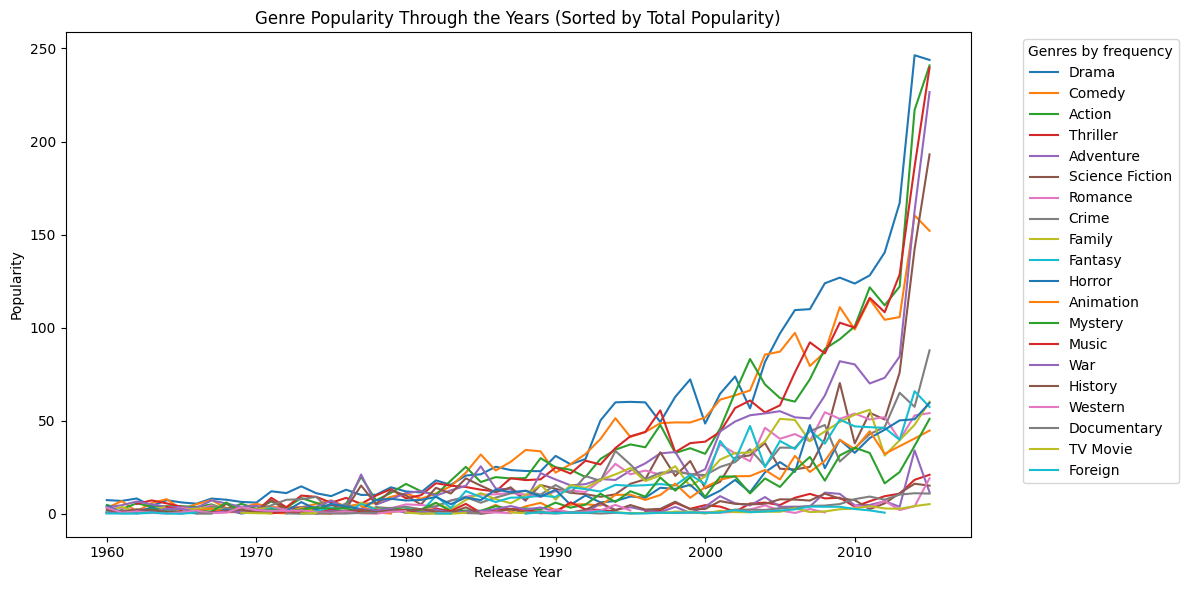

In [52]:
# Plot the sorted DataFrame
ax = pivot_sorted.plot(
    kind='line',
    figsize=(12, 6),
    title="Genre Popularity Through the Years (Sorted by Total Popularity)"
)

# Add axis labels
ax.set_xlabel("Release Year")
ax.set_ylabel("Popularity")

# Adjust layout for better readability
ax.legend(title="Genres by frequency", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.figure.tight_layout()

![Line chart showing the distribution of most popular genres of movies across years](image1.png)

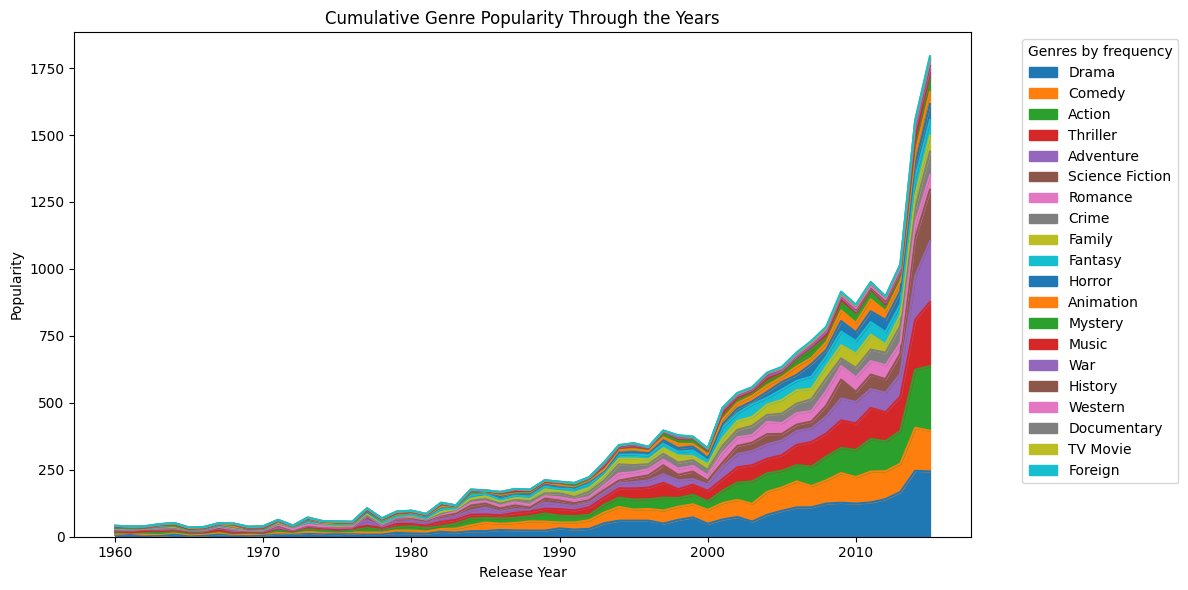

In [53]:
# Area plot
ax = pivot_sorted.plot(
    kind='area',
    stacked=True,
    figsize=(12, 6),
    title="Cumulative Genre Popularity Through the Years"
)

ax.set_xlabel("Release Year")
ax.set_ylabel("Popularity")
ax.legend(title="Genres by frequency", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.figure.tight_layout()

![Area chart showing the distribution of most popular genres of movies across years](image2.png)

In [54]:
# Pivot the table for plotting
pivot_table = genre_popularity.pivot(index='release_year', columns='genres', values='popularity')

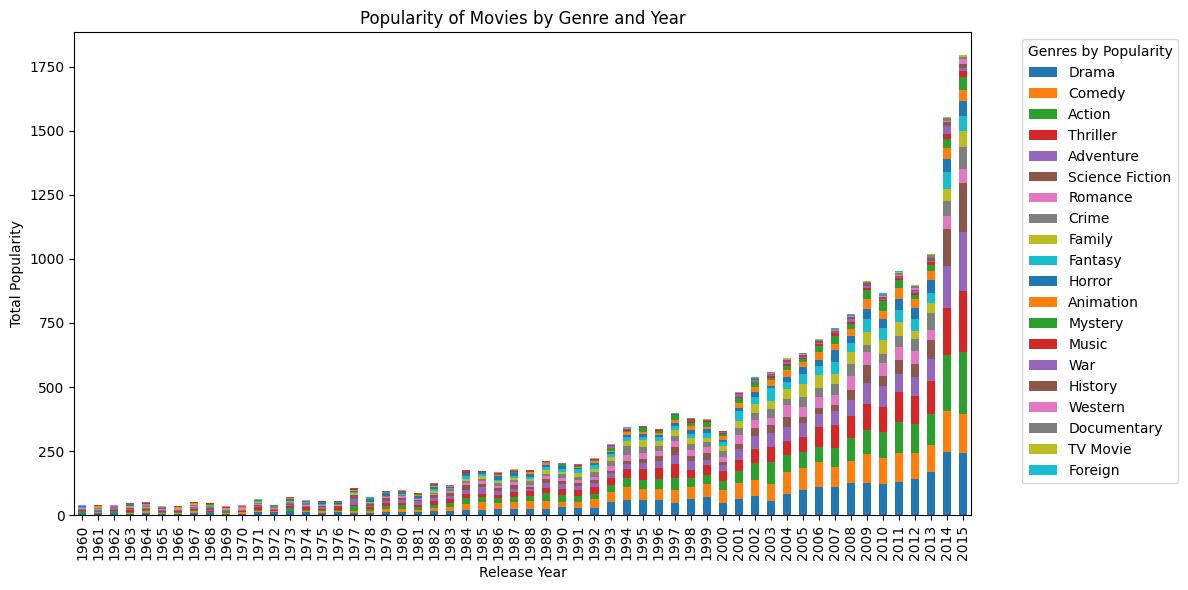

In [55]:
# Calculate the total frequency of each genre
genre_totals = pivot_table.sum(axis=0)

# Reorder the columns based on frequency
sorted_columns = genre_totals.sort_values(ascending=False).index
pivot_table = pivot_table[sorted_columns]

# Plot using Pandas' bar plot
ax = pivot_table.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    title="Popularity of Movies by Genre and Year"
)

# Customize the axes and legend
ax.set_xlabel("Release Year")
ax.set_ylabel("Total Popularity")
ax.legend(title="Genres by Popularity", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.figure.tight_layout()

![Bar chart showing the distribution of most popular genres of movies across all years](image3.png)

In [56]:
#Count the occurrences of each genre for pie chart
#Count the occurrences of each genre
genre_counts = df_exploded['genres'].value_counts()

In [57]:
# Define a threshold for "Other" category to avoid overlapping
threshold = 0.02  # e.g., genres contributing less than 2% will be grouped

In [58]:
# Calculate percentages directly if genre_counts is a Series
total = genre_counts.sum()
percentages = genre_counts / total

In [59]:
# Group small genres into "Other" to avoid overlapping
grouped_data = genre_counts[percentages >= threshold]
grouped_data['Other'] = genre_counts[percentages < threshold].sum()

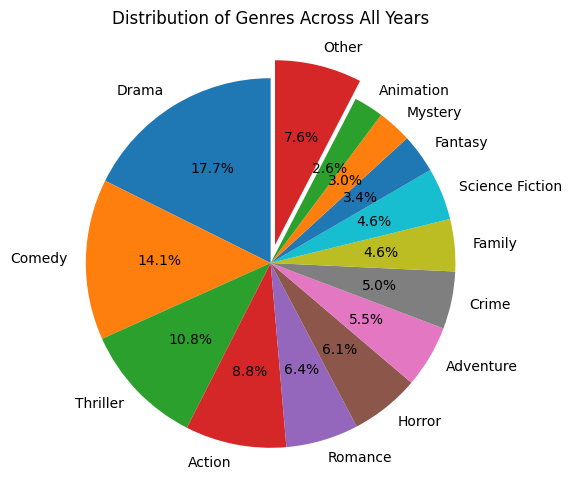

In [60]:
# Create the pie chart
grouped_data.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    figsize=(12, 6),
    explode=[0.1 if genre == 'Other' else 0 for genre in grouped_data.index],
    title='Distribution of Genres Across All Years'
)

# Hide the y-label (optional, as Pandas doesn't explicitly allow setting it in plot)
plt.ylabel('')
plt.show()

![Pie chart showing the distribution of most popular genres of movies](image4.png)

In [61]:
pivot_table.tail(10)

genres             Drama      Comedy      Action    Thriller   Adventure  \
release_year                                                               
2006          109.448943   97.197895   60.259233   75.973838   51.830019   
2007          109.945124   79.415945   72.254120   92.120424   51.230969   
2008          123.854529   86.858673   88.585296   86.206629   63.528230   
2009          126.897208  111.045444   93.794086  102.665018   81.966362   
2010          123.715224   99.039863  100.713037   99.989104   80.258813   
2011          128.088313  115.304366  121.681073  116.041838   70.028286   
2012          140.376994  104.231064  111.986677  108.295298   73.073879   
2013          166.999176  105.688203  122.089178  128.550095   84.475720   
2014          246.362717  160.332602  216.979690  186.504459  162.845275   
2015          243.848091  152.041317  240.901421  239.720907  226.581261   

genres        Science Fiction    Romance      Crime     Family    Fantasy  \
release_year                                                                
2006                23.845715  42.824858  35.458092  50.407490  34.786562   
2007                25.209269  39.021882  44.358441  39.023420  44.995426   
2008                40.234346  54.586724  47.708682  44.220459  37.681697   
2009                70.260241  50.982405  28.100370  49.350055  50.608117   
2010                37.820094  53.865920  35.293322  53.233292  46.964090   
2011                54.259455  50.677041  42.801786  55.893736  46.534893   
2012                50.663266  51.936521  46.632713  31.257886  46.166250   
2013                75.875393  39.702135  65.017269  39.526268  39.743062   
2014               142.255997  52.850344  57.459754  47.765725  65.856645   
2015               193.121886  54.085299  87.823617  60.237690  57.427532   

genres           Horror  Animation    Mystery      Music        War  \
release_year                                                          
2006          22.472028  31.127168  23.450649   8.612243   3.827430   
2007          47.665126  22.483369  30.538278  10.704663   3.911004   
2008          24.482351  28.397969  17.796434   8.271187  11.372959   
2009          39.776168  39.754622  31.375811   8.616067  10.702770   
2010          32.753184  34.745996  35.506099   3.806288   4.541660   
2011          40.690885  44.387170  32.673002   6.768360   4.731528   
2012          45.168912  32.214146  16.357765   9.453821   6.767092   
2013          50.174675  36.320297  22.426785  10.809351   3.770256   
2014          50.809329  40.464223  36.493987  18.259123  34.065885   
2015          59.583763  44.705638  51.023584  20.958333  11.560600   

genres          History    Western  Documentary  TV Movie   Foreign  
release_year                                                         
2006           7.645060   0.463068     3.302558  2.986828  2.371926  
2007           7.105169   2.559719     4.260955  0.921882  3.874893  
2008          10.829489   0.731827     4.423501  1.262595  3.780533  
2009           8.158467        NaN     5.222750  2.439304  3.768824  
2010           7.377032   4.347770     7.878228  2.846349  2.570107  
2011           2.473334   3.527401     9.250019  4.112818  1.819813  
2012           5.604431   6.931111     7.590372  2.872503  0.597536  
2013          11.042901   1.995766    10.321471  2.677460       NaN  
2014          16.144810   4.043682    11.046404  4.144533       NaN  
2015          15.118574  19.072777    10.857550  5.211474       NaN

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [62]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#Order by revenue
tmdb_movies_df_sorted = df_exploded.sort_values(
    by='revenue',
    ascending=False,
    na_position='first',
    ignore_index=True
)
tmdb_movies_df_sorted.head(10)

id    imdb_id  popularity     budget     revenue  \
0   19995  tt0499549    9.432768  237000000  2781505847   
1   19995  tt0499549    9.432768  237000000  2781505847   
2   19995  tt0499549    9.432768  237000000  2781505847   
3   19995  tt0499549    9.432768  237000000  2781505847   
4  140607  tt2488496   11.173104  200000000  2068178225   
5  140607  tt2488496   11.173104  200000000  2068178225   
6  140607  tt2488496   11.173104  200000000  2068178225   
7  140607  tt2488496   11.173104  200000000  2068178225   
8     597  tt0120338    4.355219  200000000  1845034188   
9     597  tt0120338    4.355219  200000000  1845034188   

                 original_title  \
0                        Avatar   
1                        Avatar   
2                        Avatar   
3                        Avatar   
4  Star Wars: The Force Awakens   
5  Star Wars: The Force Awakens   
6  Star Wars: The Force Awakens   
7  Star Wars: The Force Awakens   
8                       Titanic   
9                       Titanic   

                                                cast  \
0  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
1  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
2  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
3  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
4  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
5  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
6  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
7  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
8  Kate Winslet|Leonardo DiCaprio|Frances Fisher|...   
9  Kate Winslet|Leonardo DiCaprio|Frances Fisher|...   

                                            homepage       director  \
0                        http://www.avatarmovie.com/  James Cameron   
1                        http://www.avatarmovie.com/  James Cameron   
2                        http://www.avatarmovie.com/  James Cameron   
3                        http://www.avatarmovie.com/  James Cameron   
4  http://www.starwars.com/films/star-wars-episod...    J.J. Abrams   
5  http://www.starwars.com/films/star-wars-episod...    J.J. Abrams   
6  http://www.starwars.com/films/star-wars-episod...    J.J. Abrams   
7  http://www.starwars.com/films/star-wars-episod...    J.J. Abrams   
8              http://www.titanicmovie.com/menu.html  James Cameron   
9              http://www.titanicmovie.com/menu.html  James Cameron   

                                     tagline  ...  \
0                Enter the World of Pandora.  ...   
1                Enter the World of Pandora.  ...   
2                Enter the World of Pandora.  ...   
3                Enter the World of Pandora.  ...   
4              Every generation has a story.  ...   
5              Every generation has a story.  ...   
6              Every generation has a story.  ...   
7              Every generation has a story.  ...   
8  Nothing on Earth could come between them.  ...   
9  Nothing on Earth could come between them.  ...   

                                            overview runtime           genres  \
0  In the 22nd century, a paraplegic Marine is di...     162           Action   
1  In the 22nd century, a paraplegic Marine is di...     162        Adventure   
2  In the 22nd century, a paraplegic Marine is di...     162          Fantasy   
3  In the 22nd century, a paraplegic Marine is di...     162  Science Fiction   
4  Thirty years after defeating the Galactic Empi...     136           Action   
5  Thirty years after defeating the Galactic Empi...     136        Adventure   
6  Thirty years after defeating the Galactic Empi...     136  Science Fiction   
7  Thirty years after defeating the Galactic Empi...     136          Fantasy   
8  84 years later, a 101-year-old woman named Ros...     194         Thriller   
9  84 years later, a 101-year-old woman named Ros...     194            Drama   

                                production_companies release_date vote_count  \
0  Ingenious Fil

In [84]:
# Extract the relevant columns as a NumPy array
data = tmdb_movies_df_sorted[['revenue', 'popularity', 'budget', 'budget_adj', 'vote_average']].to_numpy()

In [85]:
# Compute the correlation matrix
correlation_matrix = np.corrcoef(data, rowvar=False)
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
 [[1.         0.66584035 0.72942331 0.70002799 0.19501201]
 [0.66584035 1.         0.54183671 0.50758544 0.23295711]
 [0.72942331 0.54183671 1.         0.9680849  0.10065341]
 [0.70002799 0.50758544 0.9680849  1.         0.1136654 ]
 [0.19501201 0.23295711 0.10065341 0.1136654  1.        ]]


In [89]:
# Z-score for revenue
mean_revenue = tmdb_movies_df_sorted['revenue'].mean()
std_revenue = tmdb_movies_df_sorted['revenue'].std()

tmdb_movies_df_sorted['revenue_zscore'] = (tmdb_movies_df_sorted['revenue'] - mean_revenue) / std_revenue
print(tmdb_movies_df_sorted[['revenue', 'revenue_zscore']].head())

      revenue  revenue_zscore
0  2781505847       20.689424
1  2781505847       20.689424
2  2781505847       20.689424
3  2781505847       20.689424
4  2068178225       15.291568


In [91]:
# Group data by genres
grouped_data = tmdb_movies_df_sorted.groupby('genres')['revenue']

In [92]:
# Calculate mean and overall mean
overall_mean = tmdb_movies_df_sorted['revenue'].mean()
group_means = grouped_data.mean()
group_sizes = grouped_data.size()

In [93]:
# Between-group variance
ss_between = ((group_means - overall_mean)**2 * group_sizes).sum()

In [94]:
# Within-group variance
ss_within = grouped_data.apply(lambda x: ((x - x.mean())**2).sum()).sum()

In [95]:
# Degrees of freedom
df_between = group_means.size - 1
df_within = tmdb_movies_df_sorted.shape[0] - group_means.size

In [96]:
# F-statistic
f_stat = (ss_between / df_between) / (ss_within / df_within)
print(f"F-Statistic: {f_stat}")
#The F-statistic compares the variance between groups (e.g., revenues across genres) to the variance within groups (e.g., revenue variability within each genre).

F-Statistic: 56.45614161126639


In [64]:
# Filtering top 25% movies with most revenue 
high_revenue_df = tmdb_movies_df[tmdb_movies_df['revenue'] > tmdb_movies_df['revenue'].quantile(0.75)]

In [65]:
# Explode genres column
df_exploded_high_revenue = high_revenue_df.explode('genres')

In [66]:
# Group by release year and genres, then count occurrences
genre_counts_high_revenue = df_exploded_high_revenue.groupby(['release_year', 'genres']).size().reset_index(name='count')

In [67]:
# Now, pivot the table for plotting
pivot_table_high_revenue = genre_counts_high_revenue.pivot(index='release_year', columns='genres', values='count')

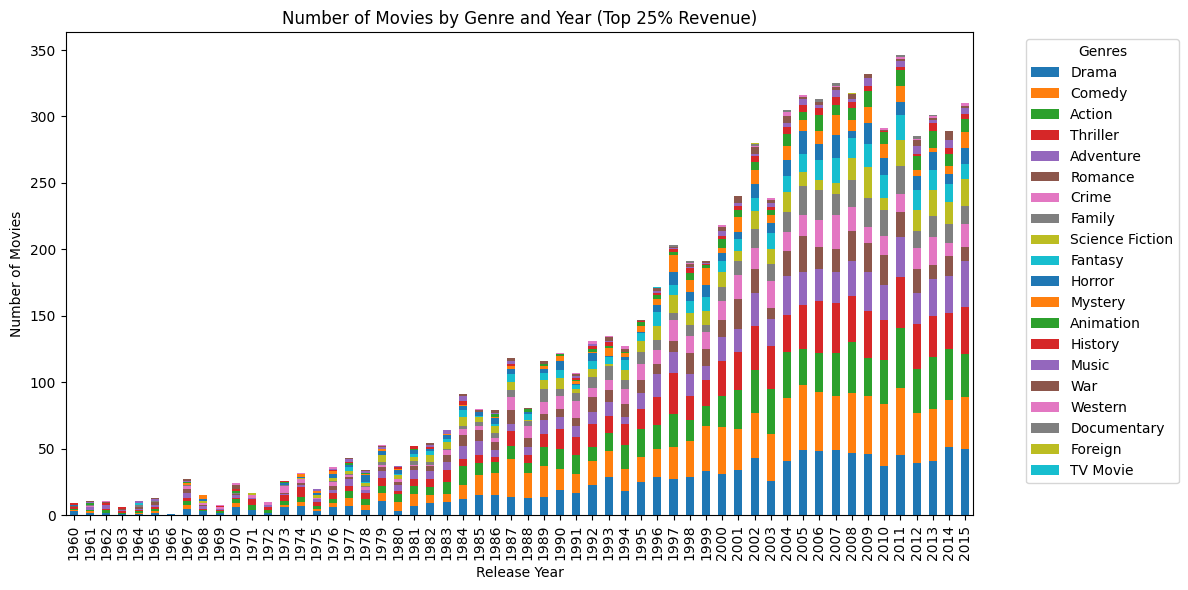

In [68]:
# Calculate the total frequency of each genre
genre_totals_high_revenue = pivot_table_high_revenue.sum(axis=0)

# Reorder the columns based on frequency
sorted_columns_high_revenue = genre_totals_high_revenue.sort_values(ascending=False).index
pivot_table_high_revenue = pivot_table_high_revenue[sorted_columns_high_revenue]

# Plot using Pandas' bar plot
ax = pivot_table_high_revenue.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    title="Number of Movies by Genre and Year (Top 25% Revenue)"
)

# Customize the plot
ax.set_xlabel("Release Year")
ax.set_ylabel("Number of Movies")
ax.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.figure.tight_layout()

![Bar chart showing the distribution of genres of the quarter movies with most high revenue across years](image3.png)

In [69]:
#Count the occurrences of each genre for pie chart
#Count the occurrences of each genre
genre_counts_high_revenue_pie = df_exploded_high_revenue['genres'].value_counts()

In [70]:
# Calculate percentages directly if genre_counts_high_revenue_pie is a Series
total_pie = genre_counts_high_revenue_pie.sum()
percentages_high_revenue = genre_counts_high_revenue_pie / total_pie

In [71]:
# Group small genres into "Other" to avoid overlapping
grouped_data_high_revenue = genre_counts_high_revenue_pie[percentages_high_revenue >= threshold]
grouped_data_high_revenue['Other'] = genre_counts_high_revenue_pie[percentages_high_revenue < threshold].sum()

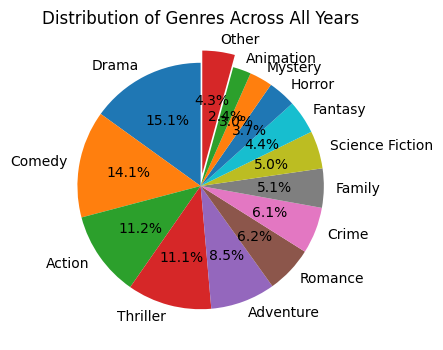

In [75]:
# Create the pie chart
plt.figure(figsize=(8, 4))
grouped_data_high_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=[0.1 if genre == 'Other' else 0 for genre in grouped_data_high_revenue.index])
plt.title('Distribution of Genres Across All Years')
plt.ylabel('')  # Hide the y-label
plt.show()

![Pie chart showing the distribution of genres of the movies with quarter most high revenue](image4.png)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

<a id='conclusions'></a>
## Questions and Answers

> **1**: Which genres are most popular from year to year? The most popular genres, ranked by frequency over the years, are: Drama, Comedy, Thriller, Action, Romance, Horror, Adventure, Crime, Family, Science Fiction.

> **2**: What kinds of properties are associated with movies that have high revenues? 
Movies with high revenues show a strong correlation with factors such as popularity, budget, and adjusted budget (budget_adj). 
Interestingly, the correlation with vote average on IMDB is lower than expected, suggesting that other factors may play a more significant role.
Aditionally, our F-Statistic of 56.46 implies that at least one genre's mean revenue is significantly different from the others. In other words, genres influence revenue and some genres are likely more lucrative than others.

In [76]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 1108321 bytes to Investigate_a_Dataset.html
